In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("path")  # Make sure the dataset is in the same folder

# Display first 5 rows
df.head()
print(df.columns)
print(df.isnull().sum())


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
print(df['Cuisines'].head())  

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object


In [10]:
#TASK 1
from collections import Counter


df = df.dropna(subset=['Cuisines'])
all_cuisines = df['Cuisines'].str.split(', ').explode()  
cuisine_counts = Counter(all_cuisines)  
top_cuisines = cuisine_counts.most_common(3)  

print("Top 3 Most Common Cuisines:", top_cuisines)


Top 3 Most Common Cuisines: [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]


In [11]:

total_restaurants = len(df)
cuisine_percentages = {Cuisine: (count / total_restaurants) * 100 for Cuisine, count in top_cuisines}

print("Percentage of restaurants serving top cuisines:", cuisine_percentages)


Percentage of restaurants serving top cuisines: {'North Indian': 41.50073359882624, 'Chinese': 28.66275413959338, 'Fast Food': 20.813246698805283}


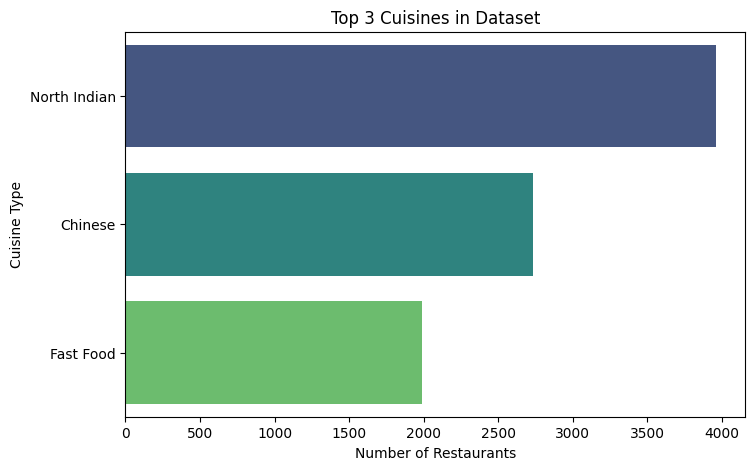

In [13]:
# Convert dictionary to dataframe for plotting
cuisine_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])

# Plot bar chart 
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Cuisine', data=cuisine_df, hue='Cuisine', dodge=False, legend=False, palette='viridis')
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 3 Cuisines in Dataset")
plt.show()



In [6]:
#TASK 2
import pandas as pd  


df = pd.read_csv()  

# Display first 5 rows
print(df.head())


print(df.columns)



   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [8]:

city_counts = df['City'].value_counts()
print(city_counts.head(10))  


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [9]:

city_counts = df['City'].value_counts()


top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print(f"The city with the highest number of restaurants is {top_city} with {top_city_count} restaurants.")


The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [10]:

city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)


highest_rated_city = city_avg_rating.idxmax()
highest_avg_rating = city_avg_rating.max()

print(f"The city with the highest average rating is {highest_rated_city} with an average rating of {highest_avg_rating:.2f}.")


The city with the highest average rating is Inner City with an average rating of 4.90.


C:\Users\ramak\AppData\Local\Temp\ipykernel_10048\1981928417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='viridis')


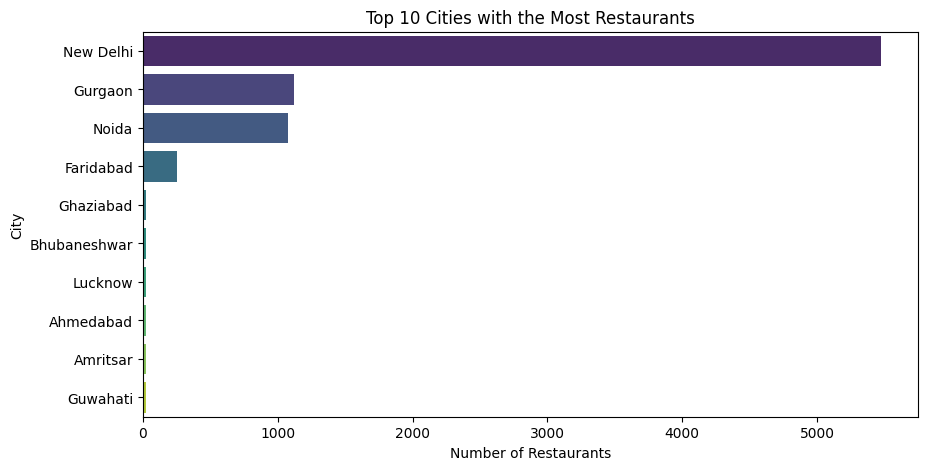

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='viridis')

plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Restaurants")
plt.show()


In [25]:
#TASK 3
print(df.columns)   #"Price Range"


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [26]:

price_counts = df['Price range'].value_counts()

# Convert to percentages
price_percentages = (price_counts / len(df)) * 100

print("Percentage of restaurants in each price range:\n", price_percentages)


Percentage of restaurants in each price range:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


C:\Users\ramak\AppData\Local\Temp\ipykernel_10048\4209502848.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Range', y='Count', data=price_df, dodge=False, legend=False, palette='coolwarm')


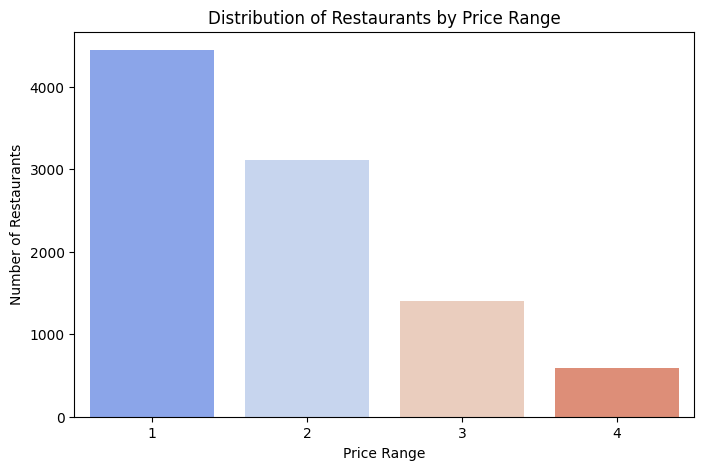

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Convert to DataFrame for Seaborn
price_df = price_counts.reset_index()
price_df.columns = ['Price Range', 'Count']

# Create bar plot
sns.barplot(x='Price Range', y='Count', data=price_df, dodge=False, legend=False, palette='coolwarm')

plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurants by Price Range")
plt.show()


In [40]:
#TASK 4
# Replace 'Online Delivery' with the correct column name
print(df.columns)
delivery_counts = df['Has Online delivery'].value_counts()

# Convert to percentages
delivery_percentages = (delivery_counts / len(df)) * 100

print("Percentage of restaurants offering online delivery:\n", delivery_percentages)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Percentage of restaurants offering online delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


In [42]:
# Replace 'Online Delivery' and 'Aggregate Rating' with correct column names
avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating of restaurants without online delivery: {avg_rating_without_delivery:.2f}")


Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47


C:\Users\ramak\AppData\Local\Temp\ipykernel_10048\2596825581.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Online Delivery', y='Count', data=delivery_df, palette='coolwarm')


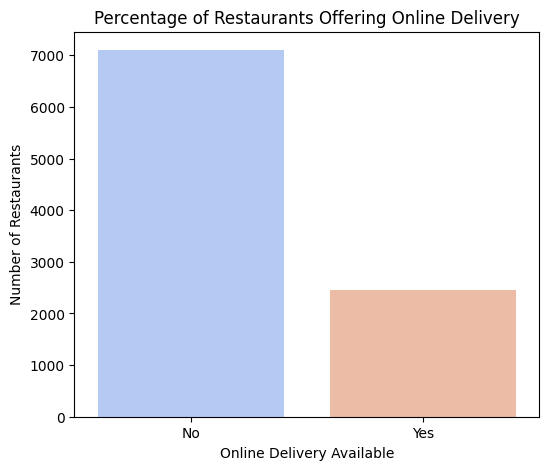

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

# Convert to DataFrame for Seaborn
delivery_df = delivery_counts.reset_index()
delivery_df.columns = ['Online Delivery', 'Count']

#bar plot
sns.barplot(x='Online Delivery', y='Count', data=delivery_df, palette='coolwarm')

plt.xlabel("Online Delivery Available")
plt.ylabel("Number of Restaurants")
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.show()


C:\Users\ramak\AppData\Local\Temp\ipykernel_10048\2791192130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Online Delivery", y="Average Rating", data=rating_df, palette="magma")


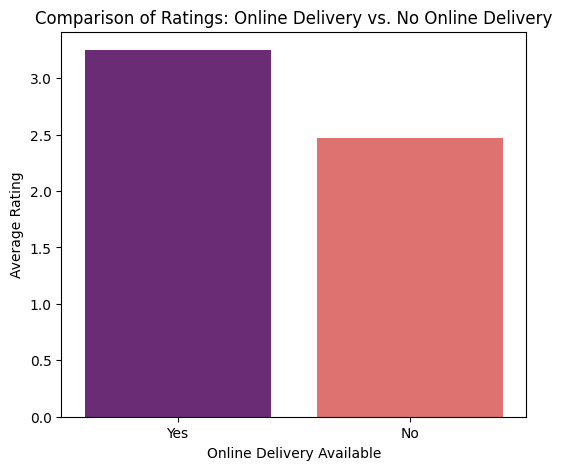

In [46]:
# Create a DataFrame for rating comparison
rating_df = pd.DataFrame({
    "Online Delivery": ["Yes", "No"],
    "Average Rating": [avg_rating_with_delivery, avg_rating_without_delivery]
})

plt.figure(figsize=(6,5))
sns.barplot(x="Online Delivery", y="Average Rating", data=rating_df, palette="magma")

plt.xlabel("Online Delivery Available")
plt.ylabel("Average Rating")
plt.title("Comparison of Ratings: Online Delivery vs. No Online Delivery")
plt.show()


In [48]:
#LEVEL 2 -->TASK 1
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


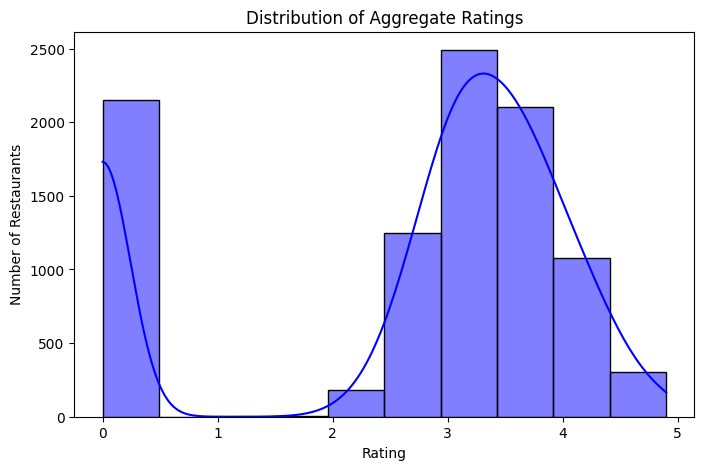

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Replace 'Aggregate Rating' with the correct column name
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='blue')

plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Aggregate Ratings")
plt.show()


In [52]:
most_common_rating = df['Aggregate rating'].mode()
print(f"The most common rating is: {most_common_rating}")


The most common rating is: 0    0.0
Name: Aggregate rating, dtype: float64


In [55]:
calculate_avg_votes = df['Votes'].mean()
print(f"the avg votes per resturants : {calculate_avg_votes}")

the avg votes per resturants : 156.909747670401


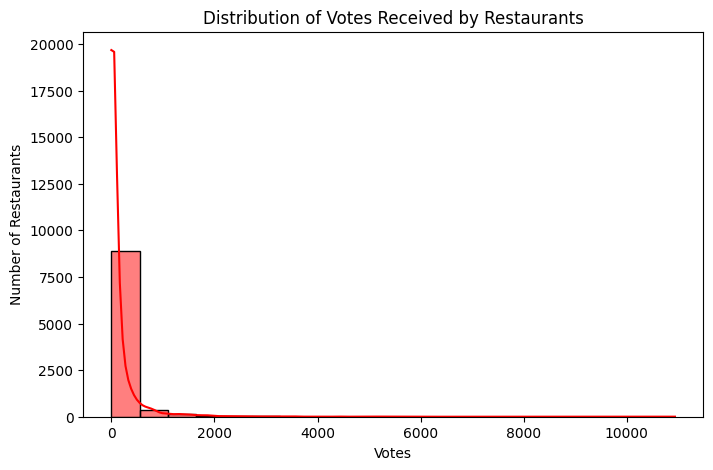

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['Votes'], bins=20, kde=True, color='Red')

plt.xlabel("Votes")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Votes Received by Restaurants")
plt.show()


In [57]:
#task 2
from collections import Counter
df = df.dropna(subset=['Cuisines'])
cuisine_combinations = df['Cuisines'].str.split(', ').explode()
combination_counts = Counter(cuisine_combinations)
top_cuisine_combinations = combination_counts.most_common(10)
print("Top 10 Most Common Cuisine Combinations:\n", top_cuisine_combinations)


Top 10 Most Common Cuisine Combinations:
 [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986), ('Mughlai', 995), ('Italian', 764), ('Bakery', 745), ('Continental', 736), ('Cafe', 703), ('Desserts', 653), ('South Indian', 636)]


In [58]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_rated_cuisines = cuisine_ratings.head(10)
print("Top 10 Highest Rated Cuisine Combinations:\n", top_rated_cuisines)


Top 10 Highest Rated Cuisine Combinations:
 Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


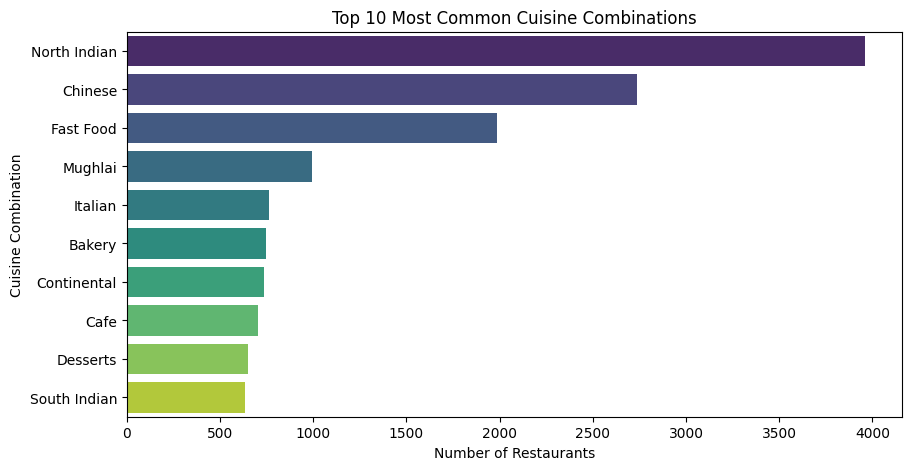

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
cuisine_df = pd.DataFrame(top_cuisine_combinations, columns=['Cuisines', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Cuisines', data=cuisine_df,  hue = 'Cuisines', palette='viridis')

plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.show()


C:\Users\ramak\AppData\Local\Temp\ipykernel_10048\481567511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_cuisines.values, y=top_rated_cuisines.index, palette='magma')


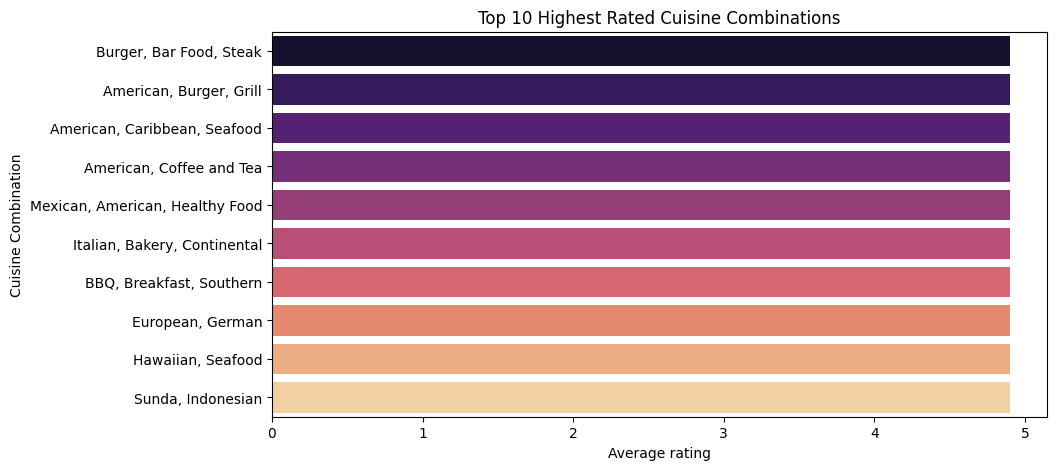

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_rated_cuisines.values, y=top_rated_cuisines.index, palette='magma')

plt.xlabel("Average rating")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Highest Rated Cuisine Combinations")
plt.show()


In [64]:
pip install folium


In [2]:
import folium
import pandas as pd
df=pd.read_csv(r"C:\Users\ramak\OneDrive\Desktop\jupyter notebook\cognify\Dataset .csv")
df = df.dropna(subset=['Latitude', 'Longitude'])  
# Initialize map centered at an average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'],  # Show city name on click
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(restaurant_map)
restaurant_map.save("restaurant_map.html")
print("Map has been saved as 'restaurant_map.html'. Open this file to view the map.")


Map has been saved as 'restaurant_map.html'. Open this file to view the map.


In [6]:
pip install geopandas


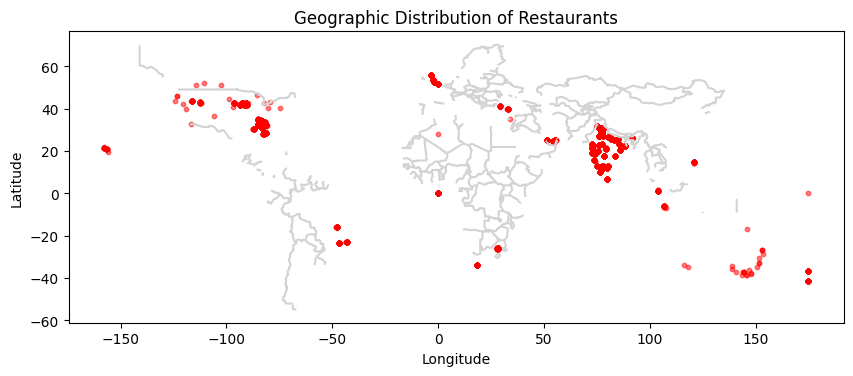

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the downloaded Natural Earth dataset (update the path if needed)
world = gpd.read_file(r"C:\Users\ramak\Downloads\ne_110m_admin_0_boundary_lines_land.zip")  # Update the path

# Convert data into a GeoDataFrame
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the clusters
plt.figure(figsize=(10,6))
world.plot(ax=plt.gca(), color='lightgrey')  # Plot base world map
geo_df.plot(ax=plt.gca(), markersize=10, color='red', alpha=0.5)  # Plot restaurant locations

plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [16]:
# Count the number of restaurants with the same name
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

print(f"Number of restaurant chains: {len(restaurant_chains)}")
print("Top 10 restaurant chains:\n", restaurant_chains.head(10))


Number of restaurant chains: 734
Top 10 restaurant chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [17]:

chain_ratings = df[df['Restaurant Name'].isin(restaurant_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()

# Get the top 10 highest-rated restaurant chains
top_rated_chains = chain_ratings.sort_values(ascending=False).head(10)

print("Top 10 highest-rated restaurant chains:\n", top_rated_chains)


Top 10 highest-rated restaurant chains:
 Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Garota de Ipanema            4.600
Dishoom                      4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64


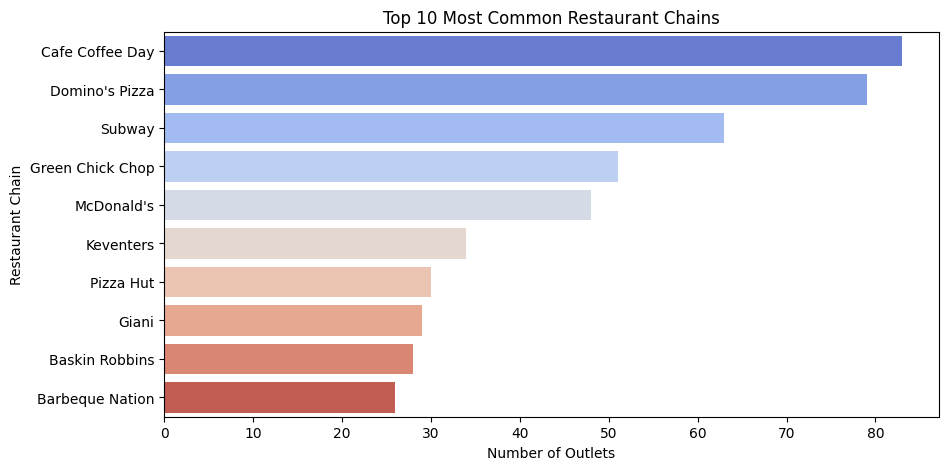

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# Convert to DataFrame for Seaborn
chain_df = restaurant_chains.head(10).reset_index()
chain_df.columns = ['Restaurant Name', 'Count']

sns.barplot(x='Count', y='Restaurant Name', data=chain_df, hue = 'Restaurant Name', palette='coolwarm')

plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Most Common Restaurant Chains")
plt.show()


C:\Users\ramak\AppData\Local\Temp\ipykernel_21252\698670295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_chains.values, y=top_rated_chains.index, palette='magma')


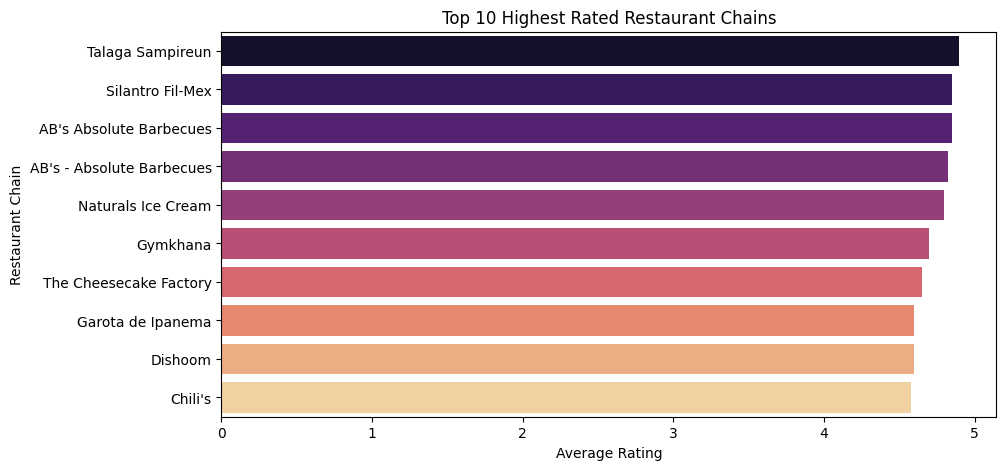

In [22]:
plt.figure(figsize=(10,5))

sns.barplot(x=top_rated_chains.values, y=top_rated_chains.index, palette='magma')

plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Highest Rated Restaurant Chains")
plt.show()
